# **Visualisation of the Dataset and Principal Component Analysis (PCA)**

Thos Google Colab notebook

# Section 1 - Import Packages

Certain packages need installing onto the virtual environment prior to use.

For this computational workflow the CIMCB package was installed using pip, CIMCB requires:

*   Python (>=3.5)
*   Bokeh (>=1.0.0)
*   Keras
*   NumPy (>=1.12)
*   SciPy
*   scikit-learn
*   Statsmodels
*   TensorFlow
*   tqdm



In [1]:
pip install cimcb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 150 kB 4.5 MB/s 


To use tools that extend beyond the basic functionalities of Python programming, packages must first be imported to enable their use in each Google Colab environment. Each package is a container of modules.

For this computational workflow, the following packages were used:


*   numpy: A fundamental package for scientific computing with Python, primarly used for the manipulation of arrays
*   pandas: A fundamental package for data analysis and manipulation
*   cimcb: A package for the statistical analysis of untargeted and targeted metabolomics data
*   matplotlib.pyplot: A package mainly used for interactive plots and simple cases of programmatic plot generation
*   seaborn: A package that provides a high-level interface for drawing attractive and informative statistical graphics
*   sklearn: A fundamental package containing tools for machine learning
  *   train_test_split: A method to split arrays into training and test subsets






In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import cimcb as cb

print('All packages successfully loaded')

All packages successfully loaded


# Section 2 - Load Data & Peak Sheet

To upload the dataset to the Google Colab notebook environment, an upload widget was used.

In [32]:
from google.colab import files

uploaded = files.upload()

Saving Data and Peak sheet_Test2.xlsx to Data and Peak sheet_Test2.xlsx


The helper function load_dataXL loads the two data sheets from the Excel file 'Data and Peak sheet_Test.xlsx'. Provided the dataset adheres to the standardised TidyData framework format, load_dataXL() outputs the data sheets from the uploaded Excel file as individual Pandas DataFrames.

In [33]:
# The path to the input file (Excel spreadsheet)
filename = 'Data and Peak sheet_Test2.xlsx'

# Load Peak and Data tables into two variables
dataTable, peakTable = cb.utils.load_dataXL(filename, DataSheet='Data', PeakSheet='Peaks')

Loadings PeakFile: Peaks
Loadings DataFile: Data
Data Table & Peak Table is suitable.
TOTAL SAMPLES: 418 TOTAL PEAKS: 8765
Done!


# Section 3 - Data Visualisation

In [34]:
display(dataTable) # View and check the dataTable

,Idx,SampleID,SampleType,Class,M1,M2,M3,M4,M5,M6,...,M8756,M8757,M8758,M8759,M8760,M8761,M8762,M8763,M8764,M8765
1,1,QC001,Quality Control,QC,50411.09729,45641.09796,31215.27093,NaN,28011.84805,38506.09295,...,NaN,51443.893940,704.669082,2623.043818,392.711305,80098.10551,3928.772565,NaN,NaN,170427.962200
2,2,QC002,Quality Control,QC,32341.54311,52932.02902,29889.98807,NaN,24745.14793,34918.06352,...,NaN,57147.067440,2564.260503,3495.746116,494.066525,83835.12104,3945.456862,NaN,NaN,168098.413700
3,3,QC003,Quality Control,QC,58060.29379,37827.72261,17552.88333,3758.435191,23692.52263,30712.12012,...,NaN,56220.046520,NaN,4214.479596,1375.512522,69257.38439,4071.731326,NaN,NaN,158402.240000
4,4,QC004,Quality Control,QC,42739.91879,65224.45749,25612.90915,179614.360000,24773.53563,41231.37729,...,NaN,57886.017640,NaN,4743.217499,1034.172715,95063.31488,6121.175989,NaN,NaN,161960.082400
5,5,QC005,Quality Control,QC,37030.56010,26194.33028,19995.51589,195365.687100,26492.32383,27747.67112,...,NaN,53388.187990,1807.475129,4590.793352,29.395440,72650.07264,4559.061786,NaN,NaN,165476.728900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,414,224,Parkinson's Disease,DN,731292.39540,756648.64570,519458.34800,NaN,368826.84800,502655.10610,...,NaN,589.779575,NaN,1937.073720,252.187189,139613.06360,402.105571,NaN,NaN,1515.461576
415,415,114,Parkinson's Disease,DN,185976.07670,150763.43910,98662.85206,NaN,160867.38920,109918.59390,...,188.115249,115783.842200,4854.073574,4841.855486,496.400802,138091.24100,10570.994270,NaN,NaN,336439.791400
416,416,229,Parkinson's Disease,DN,252454.67260,96226.27339,270316.97940,1.430355,124144.48640,49786.74319,...,NaN,620.247008,89.810078,258.758852,959.881421,81368.58195,731.044522,NaN,NaN,3277.077141
417,417,109,Parkinson's Disease,DN,NaN,NaN,NaN,4113.901965,NaN,NaN,...,NaN,11178.217080,4399.517200,7796.822242,351.947802,254987.03320,12239.665670,NaN,NaN,80636.987170


In [35]:
display(peakTable) # View and check PeakTable

,Idx,Name,Label,Perc_missing,QC_RSD
1,1,M1,1.30_1759.2632n,0.689655,49.530630
2,2,M2,1.26_1724.2127m/z,0.689655,56.583035
3,3,M3,1.34_1840.2963m/z,0.689655,41.387260
4,4,M4,2.79_1054.2716n,33.103448,122.673100
5,5,M5,1.43_1956.3807m/z,0.689655,51.342402
...,...,...,...,...,...
8761,8761,M8761,0.80_435.1527n,0.000000,267.829316
8762,8762,M8762,3.81_361.8017m/z,31.724138,102.033516
8763,8763,M8763,5.39_216.9215m/z,98.620690,141.415704
8764,8764,M8764,0.37_244.5950m/z,97.931034,86.352698


# Section 4 - Data Cleaning

According to Broadhurst (2019), it is best practice to access the quality of the data and refine the dataset by removing those metabolites that lack reporducible measurements. The QC-RSD and percentage of missing values has been calculated and are included in the peakTable DataFrame. Using those values, we remove all metabolomic features that do not meet the following criteria:

*   QC-RSD less than 20%
* Fewer than 10% of values are missing

In [36]:
# Create a clean peak table 

rsd = peakTable['QC_RSD']  
percMiss = peakTable['Perc_missing']  
peakTableClean = peakTable[(rsd < 20) & (percMiss < 10)]   

print("Number of peaks remaining: {}".format(len(peakTableClean)))

Number of peaks remaining: 2261


# Section 5 - Principal Component Analysis

In [40]:
# Extract and scale the metabolite data from the dataTable 

peaklist = peakTableClean['Name']                   # Set peaklist to the metabolite names in the peakTableClean
X = dataTable[peaklist].values                      # Extract X matrix from dataTable using peaklist
Xlog = np.log10(X)                                  # Log scale (base-10)
Xscale = cb.utils.scale(Xlog, method='auto')        # methods include auto, range, pareto, vast, and level
Xknn = cb.utils.knnimpute(Xscale, k=1)              # missing value imputation (knn - 3 nearest neighbors)

print("Xknn: {} rows & {} columns".format(*Xknn.shape))

cb.plot.pca(Xknn,
            pcx=1,                                                  # pc for x-axis
            pcy=2,                                                  # pc for y-axis
            group_label=dataTable['SampleType'])                    # labels for Hover in PCA loadings plot

/usr/local/lib/python3.7/dist-packages/cimcb/utils/knnimpute.py:92: RuntimeWarning: divide by zero encountered in true_divide
  weights = 1 / dist[1 : k + L + 1, nan_cols[i]]


Xknn: 418 rows & 2261 columns
2261


In [41]:
display(dataTable[peaklist])

,M86,M132,M137,M152,M155,M162,M164,M169,M173,M176,...,M8608,M8612,M8642,M8655,M8663,M8685,M8699,M8715,M8729,M8731
1,15173.286230,1.834347e+06,17015.953630,1.135391e+06,1.103803e+07,52107.341300,252475.66180,3.412024e+05,30685.214630,1.372475e+06,...,56693.50381,13809.92251,259520.48520,1.592997e+06,211245.92840,11009.635580,3806.800883,416789.2489,517444.9257,79317.73632
2,23285.350930,1.908372e+06,16948.467030,1.163225e+06,1.148224e+07,54628.820820,244103.81710,3.638888e+05,35918.519560,1.354951e+06,...,61373.52405,14683.49957,251918.76620,1.518321e+06,219247.72900,12501.234010,3234.033125,421652.4415,507618.4490,84579.91703
3,15704.754110,1.999388e+06,13803.604660,1.204638e+06,1.191712e+07,54501.161020,242188.76050,3.650326e+05,34918.097370,1.455332e+06,...,53920.60822,15813.91042,235489.08700,1.609344e+06,216196.01380,9427.807429,2445.627986,410677.1233,575354.3331,87994.57255
4,24624.896620,2.001141e+06,16830.134980,1.203061e+06,1.169108e+07,54960.366500,265308.00320,3.630028e+05,41857.763390,1.298893e+06,...,58854.34851,11474.85395,235793.96490,1.487037e+06,206890.45900,10667.758260,3106.927623,415645.8374,474211.8265,80471.11910
5,14943.730280,2.154800e+06,15179.719470,1.284221e+06,1.283288e+07,55161.487610,237719.07010,3.557544e+05,31764.829610,1.378777e+06,...,59557.91486,11306.38148,249775.24580,1.552165e+06,219944.50410,11854.415630,3734.934081,418876.6442,510337.0840,75639.11709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,36315.412600,8.656558e+04,23222.337100,3.317119e+04,5.598351e+05,395.919074,66311.67700,3.275502e+04,554.112946,4.154373e+04,...,46122.78831,12739.39509,133219.76360,1.078761e+06,295381.02210,5199.881800,2443.107591,231510.2665,474812.9334,88244.10204
415,35866.811280,7.278816e+04,19592.272360,2.460379e+04,8.047924e+05,4205.444231,92143.49205,1.329979e+04,54.826344,7.109643e+04,...,46576.65965,10894.21841,96108.91507,5.902008e+05,314446.36130,4286.765742,3827.322902,160844.7708,261013.7788,42853.80034
416,21391.177550,1.621379e+05,29672.810360,6.222119e+04,7.550895e+05,1751.395399,50674.20452,7.157885e+04,1507.996851,5.389367e+04,...,68105.74186,17894.81148,111495.47910,1.733569e+06,197707.73950,9569.443883,4396.332838,237807.3456,679614.8098,67960.37908
417,495.253371,4.118048e+04,15250.912450,8.606017e+05,7.962703e+06,26056.057370,180570.26800,2.219288e+04,2013.536325,1.179472e+05,...,59691.00440,17464.24978,302805.53720,1.230356e+06,255188.68980,9543.984383,2725.212169,397531.7394,927696.7840,75193.23502


# Section 6 - Data Balance Visualisation

Text(0, 0.5, 'Number of samples')

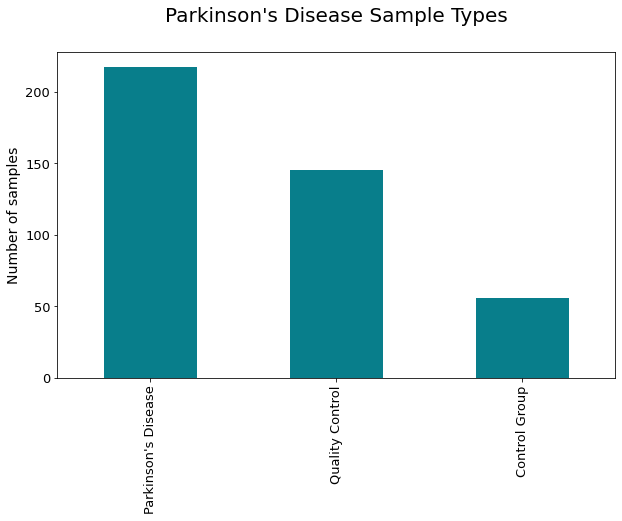

In [42]:
ax = dataTable['SampleType'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Parkinson\'s Disease Sample Types', size=20, pad=30)
ax.set_ylabel('Number of samples', fontsize=14)

Text(0, 0.5, 'Number of samples')

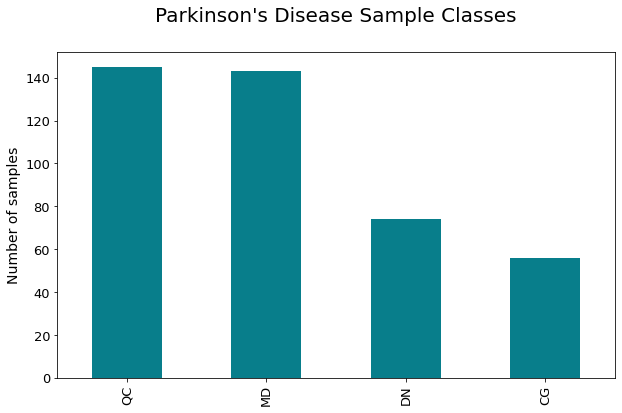

In [43]:
ax = dataTable['Class'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Parkinson\'s Disease Sample Classes', size=20, pad=30)
ax.set_ylabel('Number of samples', fontsize=14)